# Artificial Neural Networks and Deep Learning

---

## Homework 1: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.
2. Upload the `training_set.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/Challenge1_ANN

Mounted at /gdrive
/gdrive/My Drive/Challenge1_ANN


## ⚙️ Import Libraries

In [ ]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from PIL import Image
import matplotlib.gridspec as gridspec
import requests
from io import BytesIO
import tensorflow_datasets as tfds

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.1


In [ ]:
pip install --upgrade keras-cv # installation of keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 62.4 MB/s eta 0:00:00


In [ ]:
# Mixed precision, to speed up the computation --> we did not used it in the end

tfk.mixed_precision.set_global_policy("mixed_float16")

# if there are any problems with the batchnorm but it shouldn't since it is not said in the keras website
#for layer in mobilenet.layers:# model.get_layer('MobileNetV3Small').layers altrim
 #   if isinstance(layer, tf.keras.layers.BatchNormalization):
  #      layer.dtype = 'float32'

## ⏳ Load the Data

In [ ]:
# Load the dataset
data = np.load('training_set.npz')
X = data['images']
y = data['labels']
#print(X[0])

## Debugging dataset

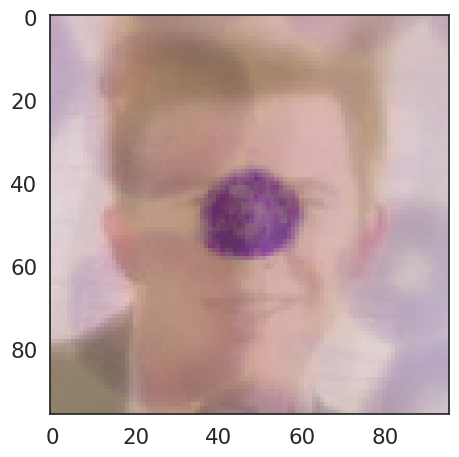

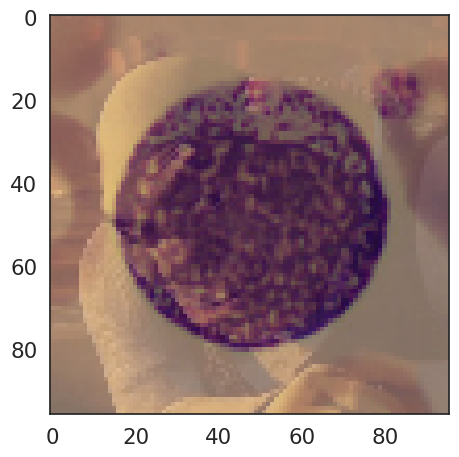

In [ ]:
# image show
plt.imshow(np.clip(X[13753],0,255))
plt.tight_layout()
plt.show()

plt.imshow(np.clip(X[13000],0,255))
plt.tight_layout()

plt.show()

In [ ]:
print(y[:10])
print(type(y)) # to see the type of the labels

[[7]
 [3]
 [6]
 [6]
 [7]
 [6]
 [2]
 [2]
 [7]
 [2]]
<class 'numpy.ndarray'>


In [ ]:
print(np.shape(X))
print(type(X)) # to see the type o the images

(13759, 96, 96, 3)
<class 'numpy.ndarray'>


In [ ]:
# Define a mapping of labels to their corresponding digit names
classes = {0: 'Basophil', 1: 'Eosinophil', 2: 'Erythroblast', 3: 'Immature granulocytes', 4: 'Lymphocyte', 5: 'Monocyte', 6: 'Neutrophil', 7: 'Platelet'}
print(classes)

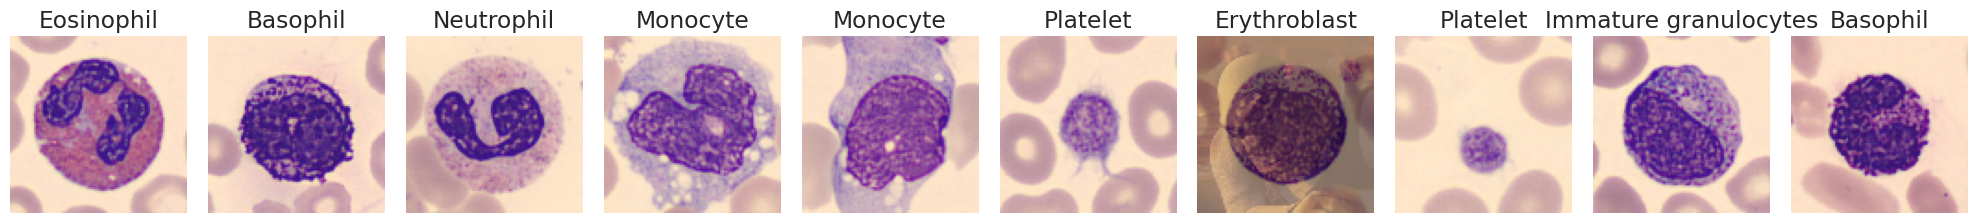

In [ ]:
# Display a sample of images from the training-validation dataset
num_img = 10
random_indices = random.sample(range(len(X)), num_img)
fig, axes = plt.subplots(1, num_img, figsize=(20,20))

# Iterate through the selected number of images
for i, idx in enumerate(random_indices):# i is the number of iterations, idx is the element of the list
    ax = axes[i % num_img]
    ax.imshow(np.squeeze(X[idx]), vmin=0., vmax=1.)
    ax.set_title(f'{classes[y[idx][0]]}')
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

## Dataset Cleaning

In [ ]:
# Define a mapping of labels to their corresponding digit names
classes = {0: 'Basophil', 1: 'Eosinophil', 2: 'Erythroblast', 3: 'Immature granulocytes', 4: 'Lymphocyte', 5: 'Monocyte', 6: 'Neutrophil', 7: 'Platelet'}
print(classes)

{0: 'Basophil', 1: 'Eosinophil', 2: 'Erythroblast', 3: 'Immature granulocytes', 4: 'Lymphocyte', 5: 'Monocyte', 6: 'Neutrophil', 7: 'Platelet'}


In [ ]:
nomi_labels=list(classes.values())
print(nomi_labels)

['Basophil', 'Eosinophil', 'Erythroblast', 'Immature granulocytes', 'Lymphocyte', 'Monocyte', 'Neutrophil', 'Platelet']


In [ ]:
# Dataset Cleaning

shrek=X[13000]
rick=X[13753]

indices_to_remove = []
for i, img in enumerate(X):
    if np.array_equal(img, shrek) or np.array_equal(img, rick):
        indices_to_remove.append(i)

# Creates a new dataset without the duplicated images
X = np.delete(X, indices_to_remove, axis=0)
y = np.delete(y, indices_to_remove, axis=0)

In [ ]:
print(np.shape(X)) # shape of the refined dataset

(11959, 96, 96, 3)


In [ ]:
# Calculate the unique target labels and their counts
unique, count = np.unique(y, return_counts=True)
print('Target labels:', unique)
for i in range(len(unique)):
    print(f'Class {unique[i]} has {count[i]} samples')

Target labels: [0 1 2 3 4 5 6 7]
Class 0 has 852 samples
Class 1 has 2181 samples
Class 2 has 1085 samples
Class 3 has 2026 samples
Class 4 has 849 samples
Class 5 has 993 samples
Class 6 has 2330 samples
Class 7 has 1643 samples


In [ ]:
# NB in this moment it is not nacessary to standardize since it is already done by the preprocessor

SPLITTING OF THE DATASET

In [ ]:
# splitting of the dataset in training, validation and test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=1000,
    random_state=seed,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=2000,
    random_state=seed,
    stratify=y_train_val
)

In [ ]:
# Calculate the unique target labels and their counts
unique_train, count_train = np.unique(y_train, return_counts=True)
print('Target labels:', unique_train)
for i in range(len(unique_train)):
    print(f'Class {unique_train[i]} has {count_train[i]} samples')

Target labels: [0 1 2 3 4 5 6 7]
Class 0 has 639 samples
Class 1 has 1634 samples
Class 2 has 813 samples
Class 3 has 1517 samples
Class 4 has 636 samples
Class 5 has 744 samples
Class 6 has 1745 samples
Class 7 has 1231 samples


BALANCING OF THE DATASET

In [ ]:
# balancing dataset classes
import keras_cv as kcv
from sklearn.utils import shuffle



# Define a sequential model for image augmentation with random translation
augmentation = tf.keras.Sequential([
        tfkl.RandomTranslation(0.2,0.2, fill_mode="nearest"),
        tfkl.RandomRotation(0.8),
        kcv.layers.RandomSharpness(factor=1.0, value_range=(0,1)),
        tfkl.RandomFlip( mode="horizontal_and_vertical")
    ])

max_elem=2500

n_iter=max_elem-count_train
for i in range(8):

    class_indeces = np.where(y_train == i)[0]

    X_scelti=random.choices(X_train[class_indeces],k=n_iter[i])
    X_scelti=np.array(X_scelti)
    #print(np.shape(X_scelti))
    #print(type(X_scelti))

    augm = np.clip(augmentation(X_scelti/255)*255,0,255)


    a_ind= np.full(len(X_scelti), i)# creo i target
    a_ind= a_ind.reshape((len(a_ind),1))
    #print(np.shape(a_ind))
    X_train=np.concatenate([X_train, augm],axis=0)
    y_train=np.concatenate([y_train, a_ind],axis=0)


X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [ ]:
# in order to augment the 3, 5, 6 classes in validation because are the most misclassified

for i in [3,5,6]:

    class_indeces = np.where(y_val == i)[0]

    X_scelti=random.choices(X_val[class_indeces],k=300)
    X_scelti=np.array(X_scelti)
    print(np.shape(X_scelti))
    print(type(X_scelti))

    augm = np.clip(augmentation(X_scelti/255)*255,0,255)


    a_ind= np.full(len(X_scelti), i)# creo i target
    a_ind= a_ind.reshape((len(a_ind),1))
    print(np.shape(a_ind))
    X_val=np.concatenate([X_val, augm],axis=0)
    y_val=np.concatenate([y_val, a_ind],axis=0)


X_val, y_val = shuffle(X_val, y_val, random_state=42)

(300, 96, 96, 3)
<class 'numpy.ndarray'>
(300, 1)
(300, 96, 96, 3)
<class 'numpy.ndarray'>
(300, 1)
(300, 96, 96, 3)
<class 'numpy.ndarray'>
(300, 1)


In [ ]:
# Convert class labels to categorical format for training, validation, and test sets
y_train = tfk.utils.to_categorical(y_train, num_classes=len(unique))
y_val = tfk.utils.to_categorical(y_val, num_classes=len(unique))
y_test = tfk.utils.to_categorical(y_test, num_classes=len(unique))
y_train_val = tfk.utils.to_categorical(y_train_val, num_classes=len(unique))

y_train=y_train.astype(np.float32)


# Print shapes of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_train_val shape: {X_train_val.shape}, y_train_val shape: {y_train_val.shape}")



X_train shape: (20000, 96, 96, 3), y_train shape: (20000, 8)
X_val shape: (2900, 96, 96, 3), y_val shape: (2900, 8)
X_test shape: (1000, 96, 96, 3), y_test shape: (1000, 8)
X_train_val shape: (10959, 96, 96, 3), y_train_val shape: (10959, 8)


In [ ]:
# other possibility using cutmix
Cut_mix_layer=kcv.layers.CutMix(alpha=1.0,seed=seed)


# y_train=y_train.astype(np.float32)

def cut_mix(image, label):
    output = Cut_mix_layer({"images": image, "labels": label})
    return output['images'], output['labels']



for i in [3,5,6]:

    class_indeces = np.where(y_train[:,i] == 1.0)[0]
    class_indeces = class_indeces.tolist()
    ind_scelti=random.sample(class_indeces,k=1500)
    X_scelti=np.array(X_train[ind_scelti])
    y_scelti=np.array(y_train[ind_scelti])
    #print(np.shape(X_scelti))
    #print(type(X_scelti))

    train_dataset = (
      tf.data.Dataset.from_tensor_slices((X_scelti, y_scelti))# Crea un dataset dai due array
      .batch(32))

    # apply FourierMix
    #augmented_dataset = train_dataset.map(cut_mix)
    X_scelti=tf.convert_to_tensor(X_scelti)
    y_scelti=tf.convert_to_tensor(y_scelti)

    X_augm, y_augm = cut_mix(X_scelti,y_scelti)


    print(np.shape(X_augm))
    print(np.shape(y_augm))


    X_train=np.concatenate([X_train, X_augm],axis=0)
    y_train=np.concatenate([y_train, y_augm],axis=0)

X_train, y_train = shuffle(X_train, y_train, random_state=42)

(1500, 96, 96, 3)
(1500, 8)
(1500, 96, 96, 3)
(1500, 8)
(1500, 96, 96, 3)
(1500, 8)


In [ ]:
print(np.shape(X_train))
print(np.shape(y_train) )

(24500, 96, 96, 3)
(24500, 8)


## 🛠️ Train and Save the Model

In [ ]:
print(y_train.shape)

(20000, 8)


In [ ]:
# Input shape for the model
input_shape = X_train.shape[1:]

# Output shape for the model
output_shape = y_train.shape[1]

print("Input Shape:", input_shape)
print("Output Shape:", output_shape)

Input Shape: (96, 96, 3)
Output Shape: 8


Model: "MobileNetV3Large"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 96, 96, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 96, 96, 3)      │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 48, 48, 16)     │            432 │ rescaling_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 48, 48, 16)     │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_20             │ (None, 48, 48, 16)     │              0 │ conv_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 48, 48, 16)     │            144 │ activation_20[0][0]    │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 48, 48, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_19 (ReLU)           │ (None, 48, 48, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 48, 48, 16)     │            256 │ re_lu_19[0][0]         │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_bn  │ (None, 48, 48, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_add (Add)   │ (None, 48, 48, 16)     │              0 │ activation_20[0][0],   │
│                           │                        │                │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand    │ (None, 48, 48, 64)     │          1,024 │ expanded_conv_add[0][… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand_bn │ (None, 48, 48, 64)     │            256 │ expanded_conv_1_expan… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_20 (ReLU)           │ (None, 48, 48, 64)     │              0 │ expanded_conv_1_expan… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_depth

 Total params: 2,996,352 (11.43 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,996,352 (11.43 MB)

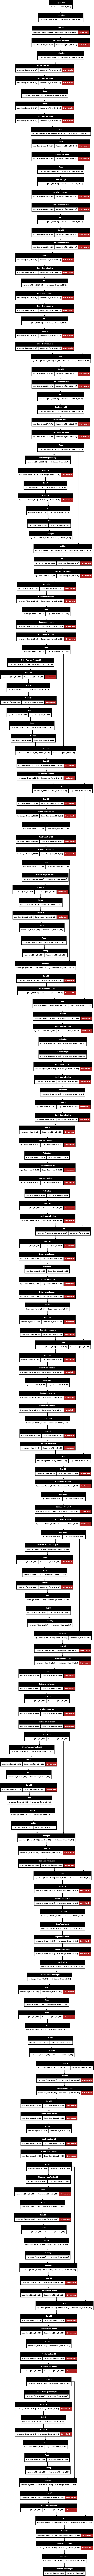

In [ ]:
from tensorflow.keras.applications import MobileNetV3Large

# Initialise MobileNetV3Large model with pretrained weights, for transfer learning
mobilenet = tfk.applications.MobileNetV3Large(
    input_shape=(96, 96, 3),
    dropout_rate=0.01,
    include_top=False,
    weights='imagenet',
    pooling='max'

)

# Freeze all layers in MobileNetV3Large to use it solely as a feature extractor
mobilenet.trainable = False

# Display a summary of the model architecture
mobilenet.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(mobilenet, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
print("Current policy:", tfk.mixed_precision.global_policy())

Current policy: <DTypePolicy "mixed_float16">


In [ ]:
# Number of training epochs
epochs = 300

# Batch size for training
batch_size = 32

# Learning rate: step size for updating the model's weights
learning_rate = 0.001

# Print the defined parameters
print("Epochs:", epochs)
print("Batch Size:", batch_size)
print("Learning Rare:", learning_rate)

Epochs: 300
Batch Size: 32
Learning Rare: 0.001


In [ ]:
def build_model(
    input_shape=input_shape,
    output_shape=output_shape,
    learning_rate=learning_rate,
    dropout=False,
    augm=False,
    l2_lambda=0,
    seed=seed
):
    tf.random.set_seed(seed)

    #initialiser = tfk.initializers.GlorotNormal(seed=seed)
    regulariser = tfk.regularizers.l2(l2_lambda)

    # Define input layer with shape matching the input images
    inputs = tfk.Input(input_shape, name='input_layer')

    x=inputs
    # Apply data augmentation for training robustness
    if(augm==True):
      augmentation = tf.keras.Sequential([
        tfkl.RandomFlip("horizontal and vertical"),
        tfkl.RandomTranslation(0.2,0.2),
        tfkl.RandomRotation(0.5),
        #tfkl.RandomContrast(0.3),

     ], name='preprocessing')
    x = augmentation(inputs)

    # Pass augmented inputs through the MobileNetV3SLarge feature extractor
    x = mobilenet(x)

    # Add a dropout layer for regularisation
    if(dropout==True):
      x = tfkl.Dropout(0.3, seed=seed, name='dropout')(x)

    x=tfkl.Dense(units=128, name='dense')(x)

    x = tfkl.ReLU(name='relu')(x)

    # Output layer with optional L2 regularisation
    if l2_lambda > 0:
        outputs = tfkl.Dense(output_shape,  kernel_regularizer=regulariser, activation='softmax', name='Output')(x)
    else:
        outputs = tfkl.Dense(output_shape,  activation='softmax', name='Output')(x)

    # Define the complete model linking input and output
    model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

    #optimizer=tfk.optimizers.Adam(learning_rate)
    #optimizer=tfk.optimizers.SGD(learning_rate, momentum=0.8,nesterov=True)
    optimizer=tfk.optimizers.Lion(learning_rate/10,weight_decay=None,use_ema=False)
    # Compile the model with categorical cross-entropy loss and Adam optimiser
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])


    # Return the model
    return model

In [ ]:
# Option 2
l2_lambda = 5e-3

l2_model=build_model(dropout=False, augm=True, l2_lambda=l2_lambda)

# Display a summary of the model architecture
l2_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(l2_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ preprocessing (Sequential)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_flip_8 (RandomFlip)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_translation_9            │ (None, 96, 96, 3)           │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_rotation_8               │ (None, 96, 96, 3)           │               0 │
│ (RandomRotation)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Large (Functional)        │ (None, 960)                 │       2,996,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_8 (InputLayer)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ rescaling_1 (Rescaling)         │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv (Conv2D)                   │ (None, 48, 48, 16)          │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv_bn (BatchNormalization)    │ (None, 48, 48, 16)          │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ activation_20 (Activation)      │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_depthwise         │ (None, 48, 48, 16)          │             144 │
│ (DepthwiseConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_depthwise_bn      │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ re_lu_19 (ReLU)                 │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_project (Conv2D)  │ (None, 48, 48, 16)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_project_bn        │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_add (Add)         │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_1_expand (Conv2D) │ (None, 48, 48, 64)          │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_1_expand_bn       │ (None, 48, 48, 64)          │             2

 Total params: 3,120,392 (11.90 MB)

 Trainable params: 124,040 (484.53 KB)

 Non-trainable params: 2,996,352 (11.43 MB)

In [ ]:
print(y_train.dtype)

float32


In [ ]:
# Rand Augmentation
rand_augment = kcv.layers.RandAugment(
        value_range=(0, 255),  # Assuming input is normalized to [0, 1]
        augmentations_per_image=2,
        magnitude=0.4,
        magnitude_stddev=0.15,
        rate=0.8,
        geometric=True,
        seed=seed,
    )
flip_layer = tfkl.RandomFlip()
rotation_layer = tfkl.RandomRotation(factor=0.5)
#cut_mix_layer = kcv.layers.CutMix(alpha=1.0, seed=seed) --> CutMix Option

# Step 1: Creation of the initial Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) # creates a dataset from the 2 arrays
train_dataset = train_dataset.shuffle(buffer_size=1000, seed=seed).batch(batch_size) # This ensures that during training, the data is not always analyzed in the same order,
# which is important to prevent the model from memorizing patterns.Batch of data on which transformations will be applied.


def augment_batch(image, label):
    image = rand_augment(image)
    image = flip_layer(image)
    image = rotation_layer(image)
    # output = cut_mix_layer({"images": image, "labels": label})
    # return output['images'], output['labels']
    return image, label

# Step 3: Application of the augmentation with .map
train_dataset = train_dataset.map(augment_batch, num_parallel_calls=tf.data.AUTOTUNE)

# Step 4: Batch Preloading
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Validation dataset (no augmentation)
val_dataset = (
    tf.data.Dataset.from_tensor_slices((X_val, y_val))
    .batch(batch_size)# data augmentation apllied to the batch
    .prefetch(buffer_size=tf.data.AUTOTUNE) # To optimize efficiency, I preload the data for the next batch
)


In [ ]:
# Define the patience value for early stopping
patience = 10

# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

reduce_LR_onPlat=tfk.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.1,
    patience=7,
    verbose=0,
    mode="max",
    min_delta=0.0015,
    cooldown=0,
    min_lr=0.00001
)

callbacks=[early_stopping]
# Store the callback in a list
callbacks = [early_stopping, reduce_LR_onPlat]

In [ ]:
# Specific for l2_regularization

# Train the model with early stopping callback
history = l2_model.fit(
    x=train_dataset,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=val_dataset,
    callbacks=callbacks
).history


# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2) # It needs to take the max because it no longer uses the last epoch,
# but the best one, due to the application of early stopping.

print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
l2_model.save('l2_weights_4.keras')

# Delete the model to free up resources
del l2_model

Epoch 1/300
766/766 ━━━━━━━━━━━━━━━━━━━━ 31s 30ms/step - accuracy: 0.5517 - loss: 1.4895 - val_accuracy: 0.8024 - val_loss: 0.5663 - learning_rate: 0.0010
Epoch 2/300
766/766 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.7245 - loss: 0.8104 - val_accuracy: 0.8593 - val_loss: 0.4098 - learning_rate: 0.0010
Epoch 3/300
766/766 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7466 - loss: 0.7171 - val_accuracy: 0.8600 - val_loss: 0.4072 - learning_rate: 0.0010
Epoch 4/300
766/766 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.7599 - loss: 0.6842 - val_accuracy: 0.8648 - val_loss: 0.3873 - learning_rate: 0.0010
Epoch 5/300
766/766 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.7689 - loss: 0.6467 - val_accuracy: 0.8366 - val_loss: 0.4681 - learning_rate: 0.0010
Epoch 6/300
766/766 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7725 - loss: 0.6446 - val_accuracy: 0.8683 - val_loss: 0.3656 - learning_rate: 0.0010
Epoch 7/300
766/766 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.7

In [ ]:
# NO

# Calculate and print the final validation accuracy
#final_val_accuracy = round(max(history['val_accuracy'])* 100, 2) # deve fare max perché non usa più l'ultima, ma la migliore avendo fatto early stopping
#print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
l2_model.save('l2_weights2.keras')

# Delete the model to free up resources
del l2_model

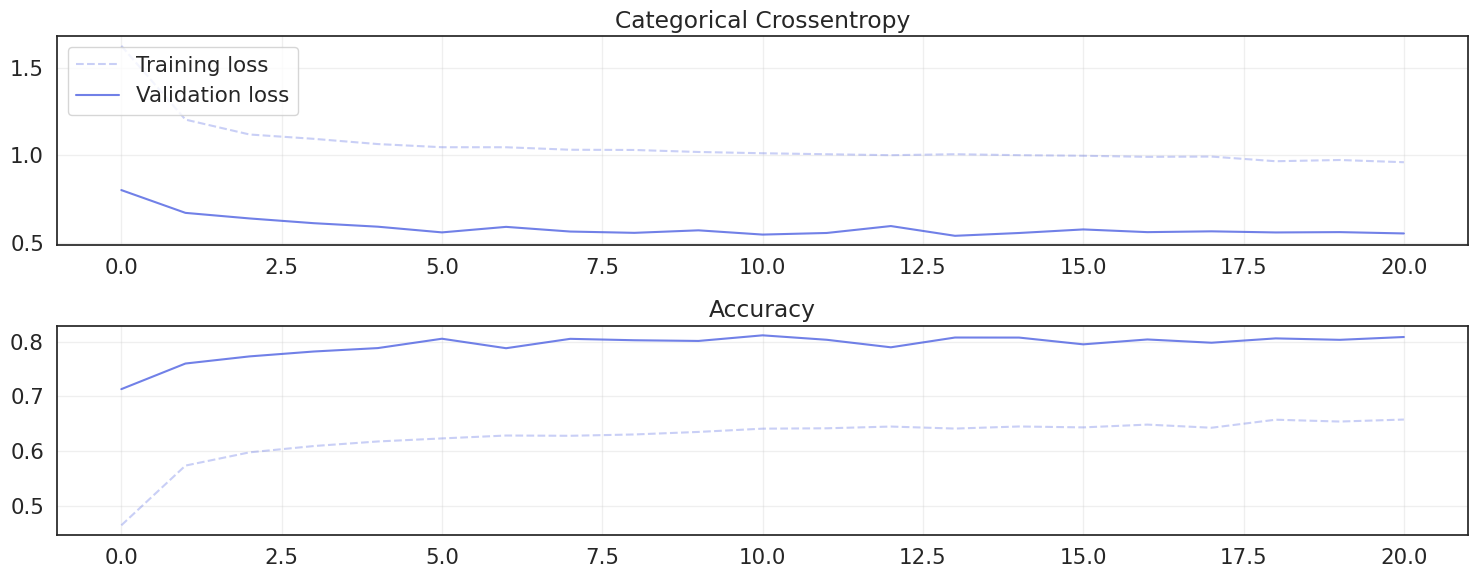

In [ ]:
# Create figure and subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

# Plot loss for both re-trained and transfer learning models
ax1.plot(history['loss'], alpha=0.3,label='Training loss', color='#4D61E2', linestyle='--')
ax1.plot(history['val_loss'], label='Validation loss', alpha=0.8, color='#4D61E2')
ax1.set_title('Categorical Crossentropy')
ax1.legend(loc='upper left')
ax1.grid(alpha=0.3)

# Plot accuracy for both re-trained and transfer learning models
ax2.plot(history['accuracy'], alpha=0.3, color='#4D61E2', linestyle='--')
ax2.plot(history['val_accuracy'], label='Transfer Learning', alpha=0.8, color='#4D61E2')
ax2.set_title('Accuracy')
ax2.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
model = tfk.models.load_model('l2_weights_3.keras')
model.save_weights('model_weights_3.weights.h5')
del model

In [ ]:
model = tfk.models.load_model('l2_weights.keras')

In [ ]:
del l2_model

In [ ]:
# Changing parameters only for fine-tuning.

l2_lambda = 1e-2

model=build_model(dropout=False, augm=True, l2_lambda=l2_lambda)
model.load_weights('model_weights_3.weights.h5')

In [ ]:
#model = tfk.models.load_model('l2_weights.keras')

# Set the MobileNetV3Large model layers as trainable
model.get_layer('MobileNetV3Large').trainable = True

# Set all MobileNetV3SLarge layers as non-trainable
for layer in model.get_layer('MobileNetV3Large').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(model.get_layer('MobileNetV3Large').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

2 conv Conv2D True
5 expanded_conv_depthwise DepthwiseConv2D True
8 expanded_conv_project Conv2D True
11 expanded_conv_1_expand Conv2D True
15 expanded_conv_1_depthwise DepthwiseConv2D True
18 expanded_conv_1_project Conv2D True
20 expanded_conv_2_expand Conv2D True
23 expanded_conv_2_depthwise DepthwiseConv2D True
26 expanded_conv_2_project Conv2D True
29 expanded_conv_3_expand Conv2D True
33 expanded_conv_3_depthwise DepthwiseConv2D True
37 expanded_conv_3_squeeze_excite_conv Conv2D True
39 expanded_conv_3_squeeze_excite_conv_1 Conv2D True
42 expanded_conv_3_project Conv2D True
44 expanded_conv_4_expand Conv2D True
47 expanded_conv_4_depthwise DepthwiseConv2D True
51 expanded_conv_4_squeeze_excite_conv Conv2D True
53 expanded_conv_4_squeeze_excite_conv_1 Conv2D True
56 expanded_conv_4_project Conv2D True
59 expanded_conv_5_expand Conv2D True
62 expanded_conv_5_depthwise DepthwiseConv2D True
66 expanded_conv_5_squeeze_excite_conv Conv2D True
68 expanded_conv_5_squeeze_excite_conv_1 Co

0 input_layer_1 False
1 rescaling False
2 conv False
3 conv_bn False
4 activation False
5 expanded_conv_depthwise False
6 expanded_conv_depthwise_bn False
7 re_lu False
8 expanded_conv_project False
9 expanded_conv_project_bn False
10 expanded_conv_add False
11 expanded_conv_1_expand False
12 expanded_conv_1_expand_bn False
13 re_lu_1 False
14 expanded_conv_1_depthwise_pad False
15 expanded_conv_1_depthwise False
16 expanded_conv_1_depthwise_bn False
17 re_lu_2 False
18 expanded_conv_1_project False
19 expanded_conv_1_project_bn False
20 expanded_conv_2_expand False
21 expanded_conv_2_expand_bn False
22 re_lu_3 False
23 expanded_conv_2_depthwise False
24 expanded_conv_2_depthwise_bn False
25 re_lu_4 False
26 expanded_conv_2_project False
27 expanded_conv_2_project_bn False
28 expanded_conv_2_add False
29 expanded_conv_3_expand False
30 expanded_conv_3_expand_bn False
31 re_lu_5 False
32 expanded_conv_3_depthwise_pad False
33 expanded_conv_3_depthwise False
34 expanded_conv_3_depthwise_

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ preprocessing (Sequential)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_flip_3 (RandomFlip)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_translation_4            │ (None, 96, 96, 3)           │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ random_rotation_3               │ (None, 96, 96, 3)           │               0 │
│ (RandomRotation)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Large (Functional)        │ (None, 960)                 │       2,996,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer_1 (InputLayer)      │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ rescaling (Rescaling)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv (Conv2D)                   │ (None, 48, 48, 16)          │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ conv_bn (BatchNormalization)    │ (None, 48, 48, 16)          │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ activation (Activation)         │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_depthwise         │ (None, 48, 48, 16)          │             144 │
│ (DepthwiseConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_depthwise_bn      │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ re_lu (ReLU)                    │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_project (Conv2D)  │ (None, 48, 48, 16)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_project_bn        │ (None, 48, 48, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_add (Add)         │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_1_expand (Conv2D) │ (None, 48, 48, 64)          │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ expanded_conv_1_expand_bn       │ (None, 48, 48, 64)          │             2

 Total params: 3,120,392 (11.90 MB)

 Trainable params: 2,673,464 (10.20 MB)

 Non-trainable params: 446,928 (1.70 MB)

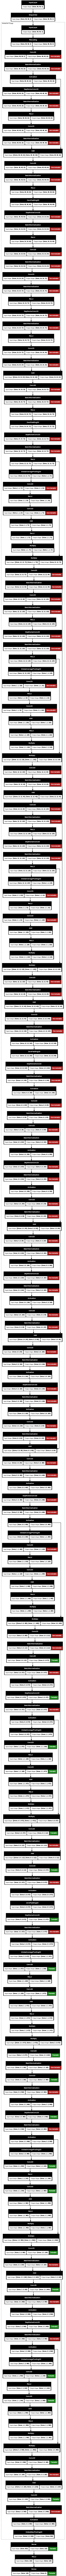

In [ ]:
# Set the number of layers to freeze
N = 124

# Set the first N layers as non-trainable
for i, layer in enumerate(model.get_layer('MobileNetV3Large').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(model.get_layer('MobileNetV3Large').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Fine Tuning

In [ ]:
# I compile the model with a lower learning rate for fine-tuning.

learning_rate=5e-5
optimizer=tfk.optimizers.Adam(learning_rate)
#optimizer=tfk.optimizers.SGD(learning_rate, momentum=0.8,nesterov=True)
#optimizer=tfk.optimizers.Lion(learning_rate/5,weight_decay=None,use_ema=False)
# Compile the model with categorical cross-entropy loss and Adam optimiser


model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])
# Note: The learning rate must be very low at this stage.

In [ ]:
# Fine-tune the model

early_stopping=tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=11, restore_best_weights=True)

callbacks=[early_stopping]

reduce_LR_onPlat=tfk.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.25,
    patience=7,
    verbose=0,
    mode="max",
    min_delta=0.0015,
    cooldown=0,
    min_lr=0.000005
)

callbacks=[early_stopping, reduce_LR_onPlat]


history = model.fit(
    x=train_dataset,
    batch_size=batch_size,
    epochs=100,
    validation_data=val_dataset,
    callbacks=callbacks
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Chall_1_MobileNetV3L_'+str(final_val_accuracy)+'.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.8047 - loss: 0.5668 - val_accuracy: 0.9262 - val_loss: 0.2243 - learning_rate: 5.0000e-05
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.8410 - loss: 0.4516 - val_accuracy: 0.9317 - val_loss: 0.2049 - learning_rate: 5.0000e-05
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.8577 - loss: 0.4069 - val_accuracy: 0.9476 - val_loss: 0.1519 - learning_rate: 5.0000e-05
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8648 - loss: 0.3948 - val_accuracy: 0.9500 - val_loss: 0.1518 - learning_rate: 5.0000e-05
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.8705 - loss: 0.3702 - val_accuracy: 0.9421 - val_loss: 0.1737 - learning_rate: 5.0000e-05
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.8807 - loss: 0.3507 - val_accuracy: 0.9510 - val_loss: 0.1401 - learning_rate: 5.0000e-05
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 4

In [ ]:
# NO
# Calculate and print the final validation accuracy
#final_val_accuracy = round(max(history['val_accuracy'])* 100, 2) # deve fare max perché non usa più l'ultima, ma la migliore avendo fatto early stopping
#print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model.save('Modello_minore_l2_reg.keras')

# Delete the model to free up resources
del model

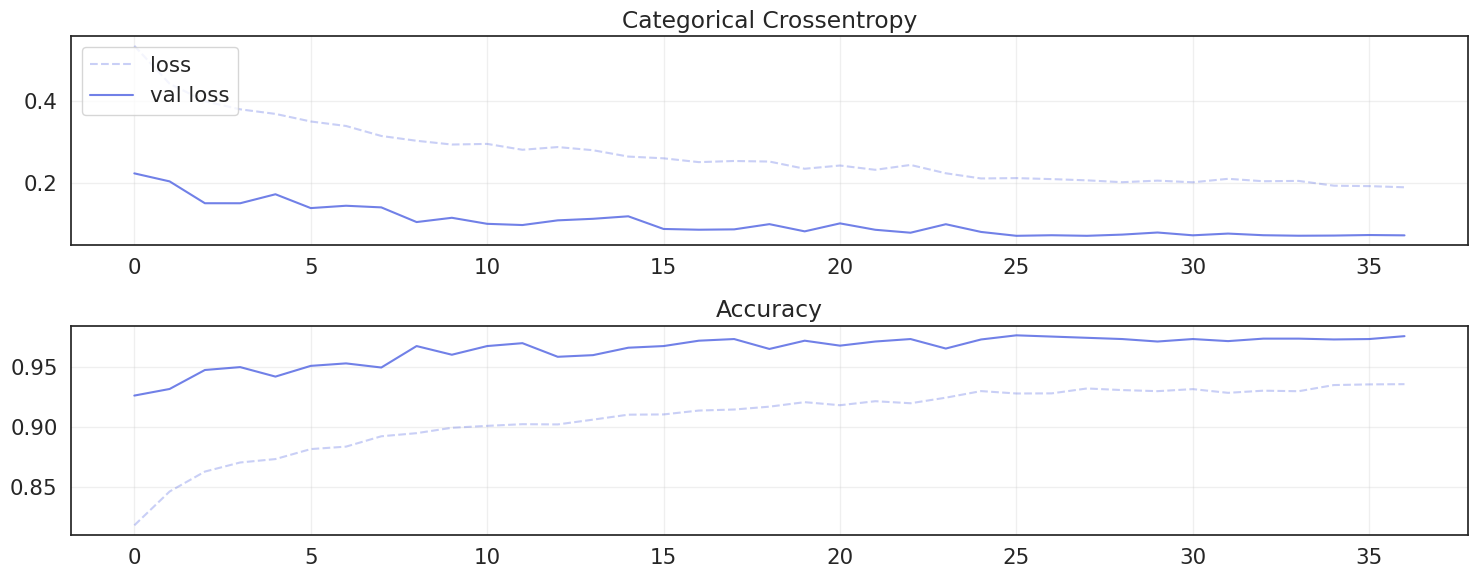

In [ ]:
# Create figure and subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

# Plot loss for both re-trained and transfer learning models
ax1.plot(history['loss'], alpha=0.3, color='#4D61E2',label='loss', linestyle='--')
ax1.plot(history['val_loss'], label='val loss', alpha=0.8, color='#4D61E2')
ax1.set_title('Categorical Crossentropy')
ax1.legend(loc='upper left')
ax1.grid(alpha=0.3)

# Plot accuracy for both re-trained and transfer learning models
ax2.plot(history['accuracy'], alpha=0.3,label='accuracy', color='#4D61E2', linestyle='--')
ax2.plot(history['val_accuracy'], label='Val accuracy', alpha=0.8, color='#4D61E2')
ax2.set_title('Accuracy')
ax2.grid(alpha=0.3)
plt.tight_layout()

plt.savefig('Fine_tuning_Adam.png')
plt.show()

## 🕹️ Use the Model - Make Inference

Accuracy score over the test set: 0.976
Precision score over the test set: 0.9763
Recall score over the test set: 0.976
F1 score over the test set: 0.976


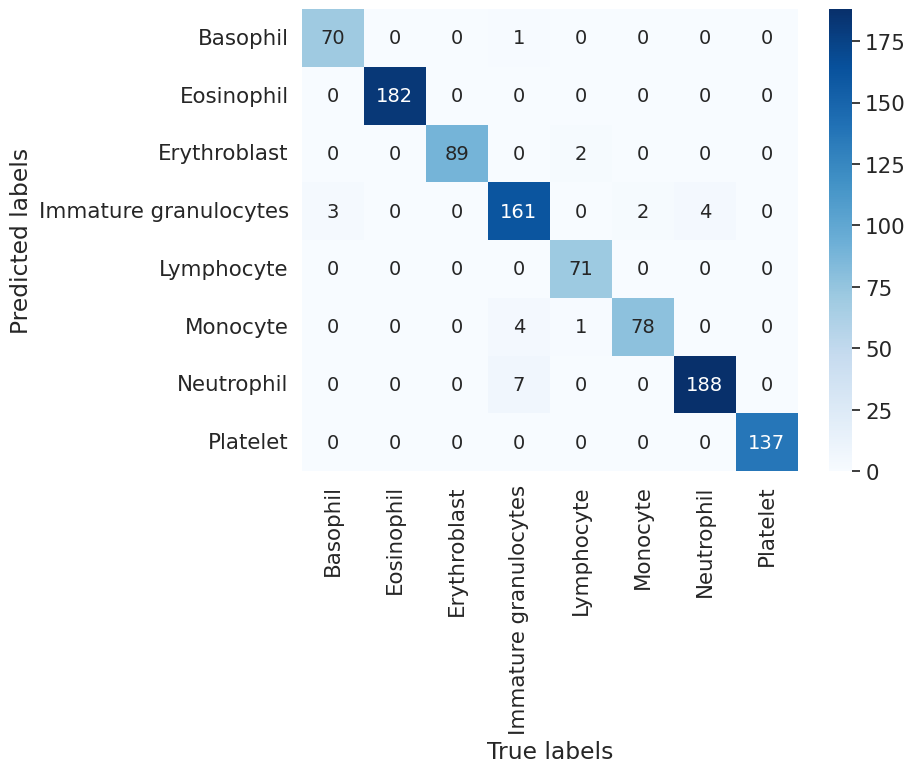

In [ ]:

model= tfk.models.load_model('Chall_1_MobileNetV3L_97.66.keras')

# Predict class probabilities and get predicted classes
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

# Extract ground truth classes
test_gt = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

# Calculate and display test set precision
test_precision = precision_score(test_gt, test_predictions, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')

# Calculate and display test set recall
test_recall = recall_score(test_gt, test_predictions, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')

# Calculate and display test set F1 score
test_f1 = f1_score(test_predictions, test_gt,  average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(test_gt, test_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=nomi_labels, yticklabels=nomi_labels, cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [ ]:
#%%writefile model.py

import numpy as np
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl



class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Load only the weights from
        'weights.keras' and create the model architecture from scratch.
        """
        # Create the model architecture
        self.neural_network = tfk.models.load_model('Chall_1_MobileNetV3L_97.66.keras')

        # Define the data augmentation pipeline for Test-Time Augmentation (TTA)
        self.data_augmentation = tfk.Sequential([
            tfkl.RandomFlip("horizontal_and_vertical"),
            tfkl.RandomRotation(0.5),
            #tfkl.RandomBrightness(0.4, value_range=(0,1)),
            tfkl.RandomContrast(0.35),
            tfkl.RandomTranslation(0.2,0.2),
        ])

    def predict(self, X):

        """
        Predict the labels for a batch of input images using TTA
        """
        X=X/255
        N_aug=5

        predictions = self.neural_network.predict(X*255)
        predictions=predictions.reshape(1,len(X),8)
        for i in range(N_aug):
          augmented_X = self.data_augmentation(X)
          predict = self.neural_network.predict(augmented_X*255)
          predict=predict.reshape(1,len(X),8)
          #print(np.shape(predict))
          #print(np.shape(predictions))
          predictions = np.concatenate([predictions,predict],axis=0)
        #print(predictions[:,5,:])
        mean_predictions = np.mean(predictions, axis=0)
        #print(np.shape(mean_predictions))
        predictions=np.argmax(mean_predictions,axis=1)
        #print(type(predictions))
        # Convert predictions to a numpy array

        return predictions



In [ ]:
del model

In [ ]:
model = Model()

test_predictions=model.predict(X_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
print(type(test_predictions))
print(np.shape(test_predictions))

<class 'numpy.ndarray'>
(1000,)


Accuracy score over the test set: 0.985
Precision score over the test set: 0.9853
Recall score over the test set: 0.985
F1 score over the test set: 0.985


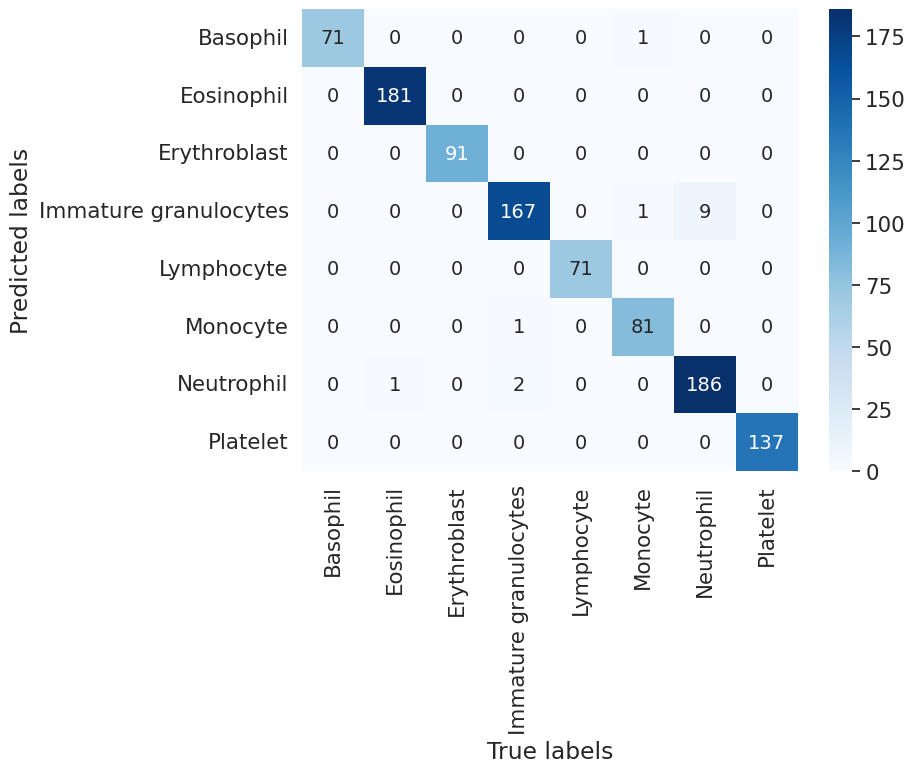

In [ ]:

# Predict class probabilities and get predicted classes

# Extract ground truth classes
test_gt = np.argmax(y_test, axis=-1)

# Calculate and display test set accuracy
test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

# Calculate and display test set precision
test_precision = precision_score(test_gt, test_predictions, average='weighted')
print(f'Precision score over the test set: {round(test_precision, 4)}')

# Calculate and display test set recall
test_recall = recall_score(test_gt, test_predictions, average='weighted')
print(f'Recall score over the test set: {round(test_recall, 4)}')

# Calculate and display test set F1 score
test_f1 = f1_score(test_gt, test_predictions, average='weighted')
print(f'F1 score over the test set: {round(test_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(test_predictions,test_gt)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=nomi_labels, yticklabels=nomi_labels, cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

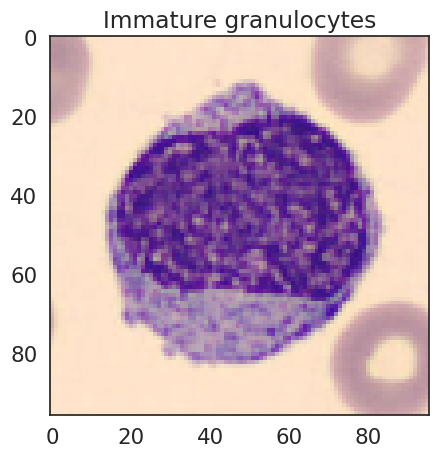

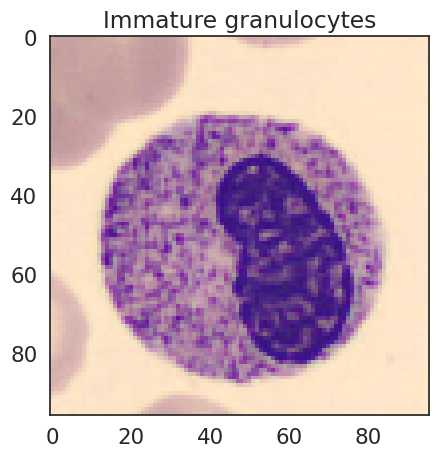

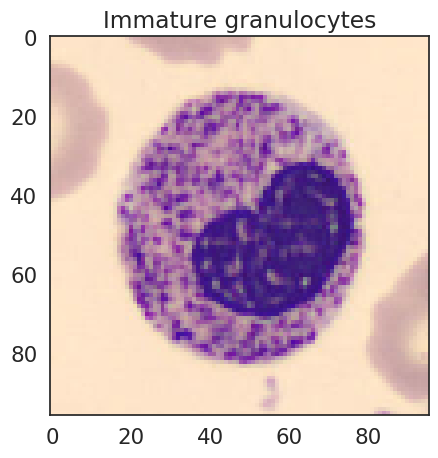

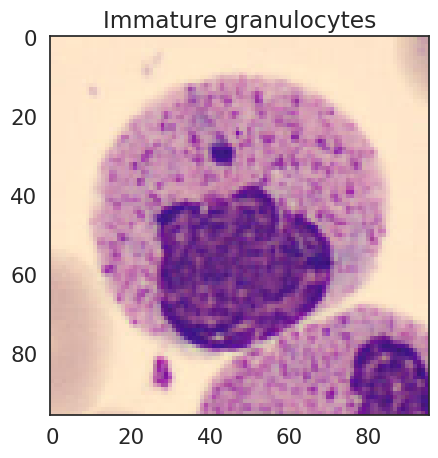

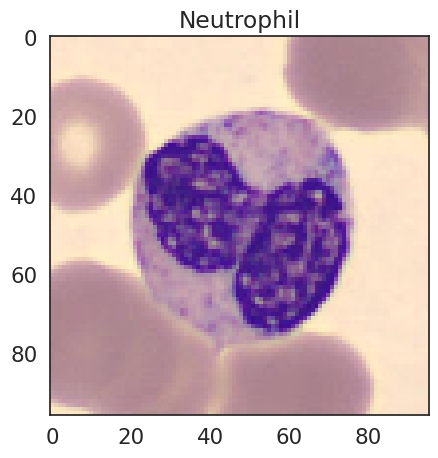

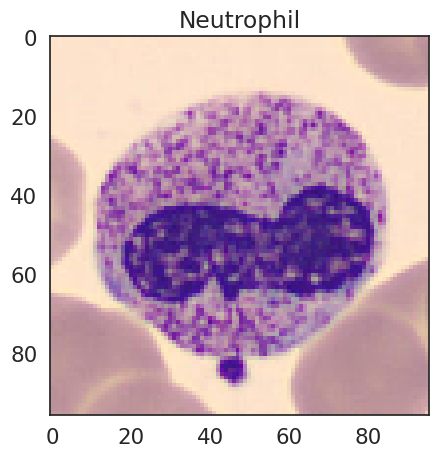

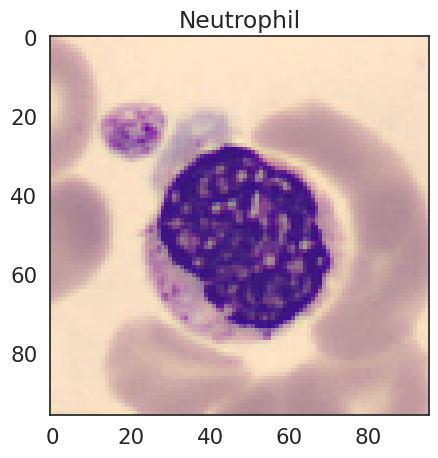

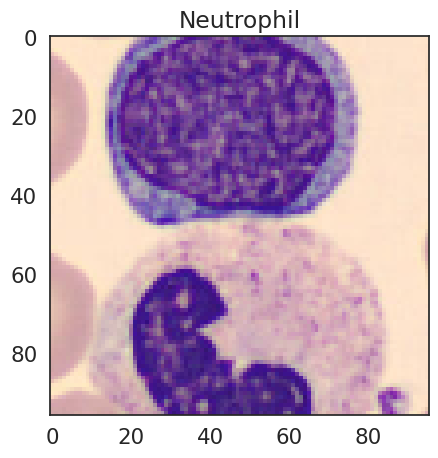

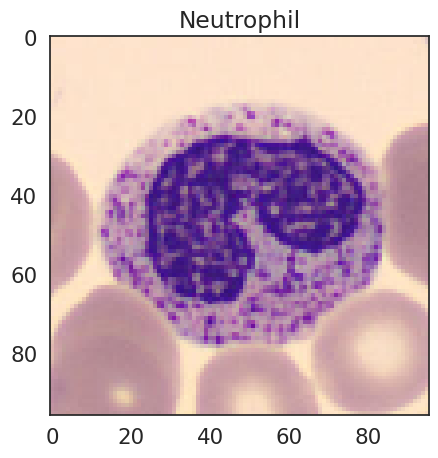

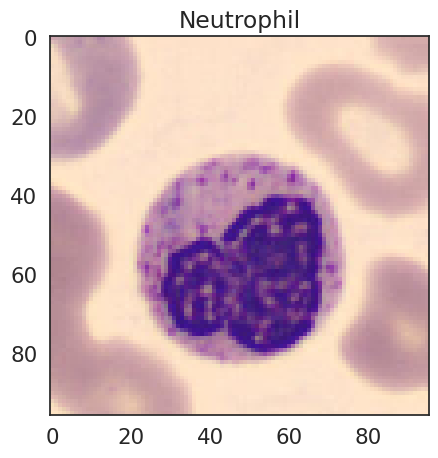

In [ ]:
# showing misclassified images

ind_elem_critici=[]
for i in range(len(test_gt)):
  if((test_gt[i]==3 and test_predictions[i]==5) or (test_gt[i]==3 and test_predictions[i]==6)) :
    ind_elem_critici.append(i)

for i in ind_elem_critici:
  plt.imshow(np.clip(X_test[i],0,255))
  plt.title(f'{classes[test_gt[i]]}')
  plt.tight_layout()
  plt.show()

ind_elem_critici=[]
for i in range(len(test_gt)):
  if((test_gt[i]==5 and test_predictions[i]==3) or (test_gt[i]==6 and test_predictions[i]==3)) :
    ind_elem_critici.append(i)

for i in ind_elem_critici:
  plt.imshow(np.clip(X_test[i],0,255))
  plt.title(f'{classes[test_gt[i]]}')
  plt.tight_layout()
  plt.show()

In [ ]:
print(test_predictions[:10])

[2 4 6 5 6 6 3 2 0 6]


In [ ]:
# Create figure and subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

# Plot loss for both re-trained and transfer learning models
ax1.plot(history['loss'], alpha=0.3, color='#4D61E2', linestyle='--')
ax1.plot(history['val_loss'], label='Transfer Learning', alpha=0.8, color='#4D61E2')
ax1.set_title('Categorical Crossentropy')
ax1.legend(loc='upper left')
ax1.grid(alpha=0.3)

# Plot accuracy for both re-trained and transfer learning models
ax2.plot(history['accuracy'], alpha=0.3, color='#4D61E2', linestyle='--')
ax2.plot(history['val_accuracy'], label='Transfer Learning', alpha=0.8, color='#4D61E2')
ax2.set_title('Accuracy')
ax2.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 📊 Prepare Your Submission

To prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:

```python
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""
```

The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.

❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [ ]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py   .keras

from google.colab import files
files.download(filename)